In [0]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

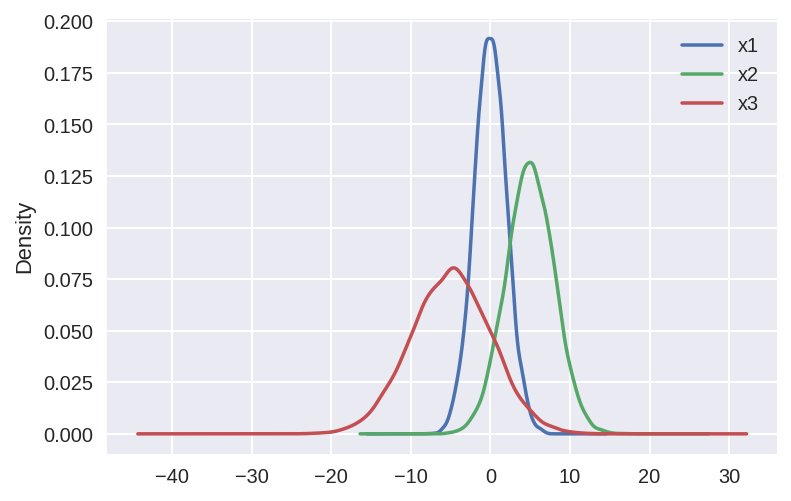

In [3]:
# plotting data

df.plot.kde()

In [0]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
data_tf = standardscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

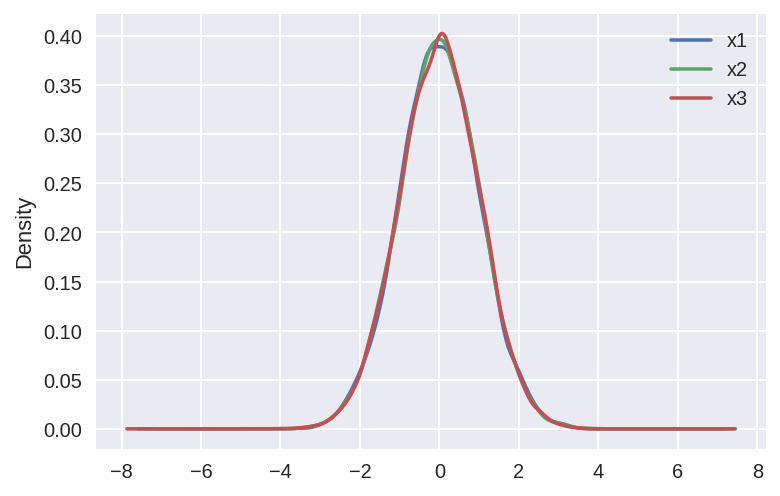

In [5]:
df.plot.kde()

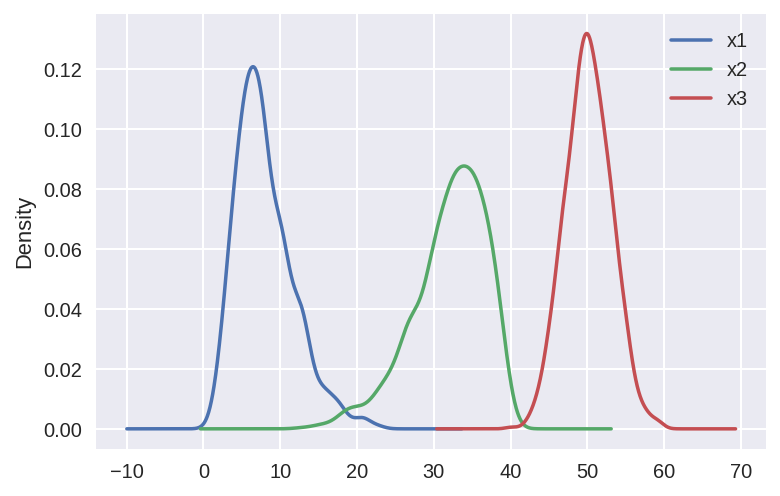

In [6]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

df.plot.kde()

In [0]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

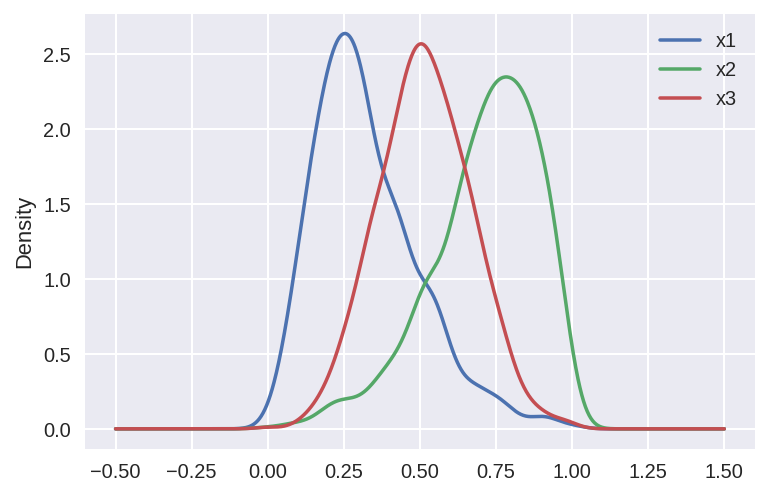

In [8]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

In [0]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

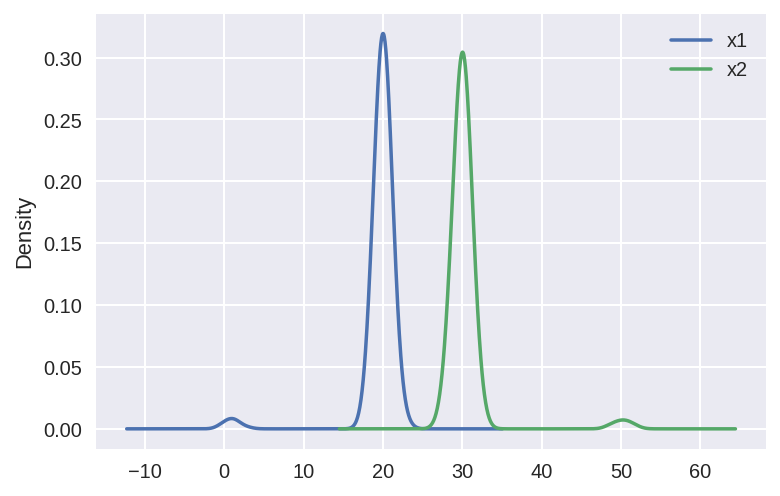

In [10]:
df.plot.kde()

In [0]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

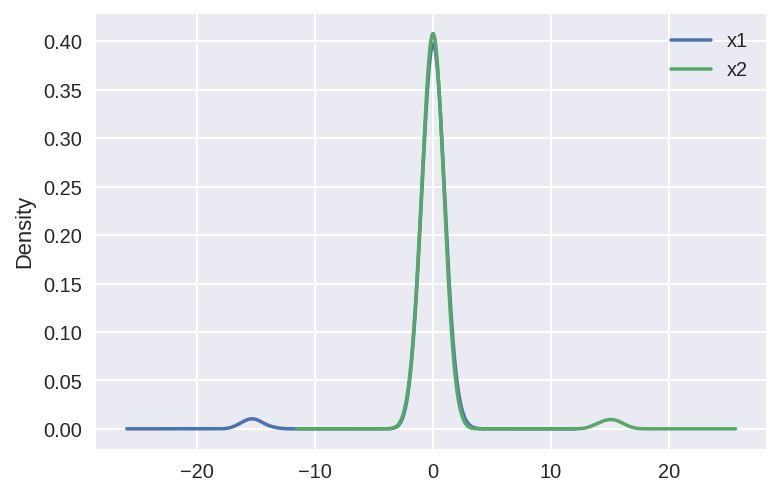

In [12]:
df.plot.kde()

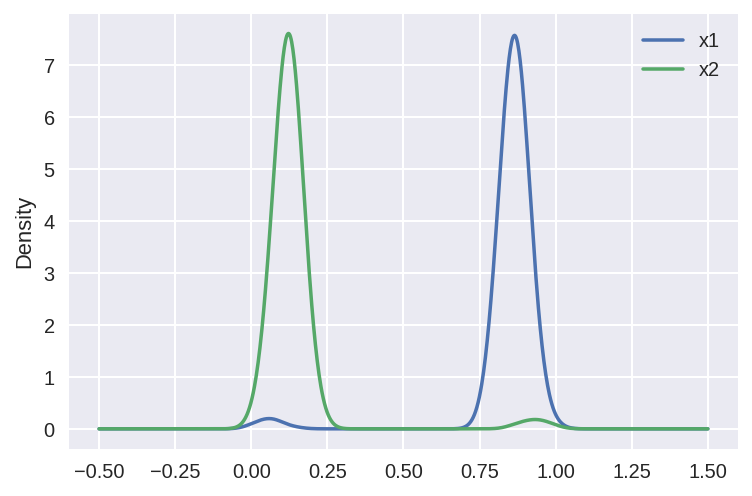

In [15]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])
df.plot.kde()

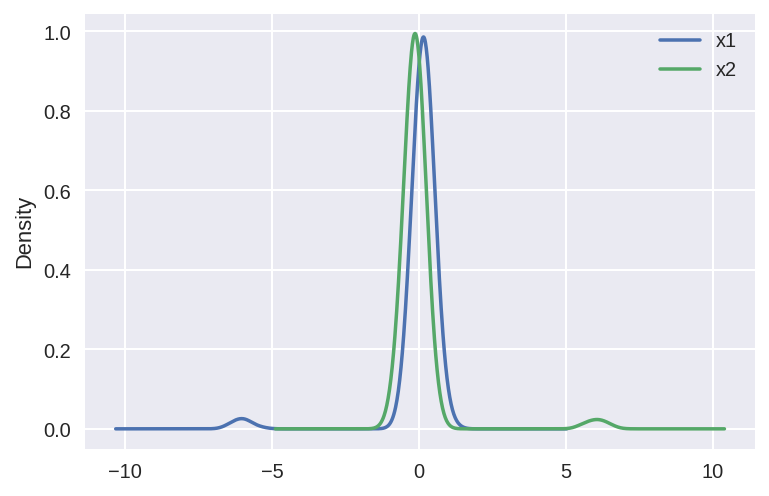

In [16]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
data_tf = standardscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])
df.plot.kde()

## 7. Encoding Categorical Values 
#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [0]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [14]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [0]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [0]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [0]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [0]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [0]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## 11. Text Processing
* Perhaps one of the most common information
* Learning algorithms don't understand text but only numbers
* Below menthods convert text to numbers

## 12. CountVectorizer
* Each column represents one word, count refers to frequency of the word
* Sequence of words are not maintained

#### Hyperparameters
* n_grams - Number of words considered for each column
* stop_words - words not considered
* vocabulary - only words considered


In [0]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]
df = pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible.
3,Is this the first document?


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [0]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [0]:
cv.vocabulary_

{'this': 12,
 'is': 6,
 'the': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 9,
 'and': 0,
 'third': 11,
 'one': 8,
 'mission': 7,
 'impossible': 5}

In [0]:
cv = CountVectorizer(stop_words=['the','is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [0]:
cv.vocabulary_

{'this': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 8,
 'and': 0,
 'third': 9,
 'one': 7,
 'mission': 6,
 'impossible': 5}

In [0]:
cv = CountVectorizer(vocabulary=['mission','food','second'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 0],
       [0, 0, 2],
       [1, 0, 0],
       [0, 0, 0]])

In [0]:
cv = CountVectorizer(ngram_range=[1,2])
cv.fit_transform(df.Text).toarray()

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [0]:
cv.vocabulary_

{'this': 28,
 'is': 10,
 'the': 21,
 'first': 6,
 'document': 4,
 'awesome': 2,
 'food': 8,
 'this is': 29,
 'is the': 12,
 'the first': 22,
 'first document': 7,
 'document awesome': 5,
 'awesome food': 3,
 'second': 18,
 'the second': 24,
 'second second': 20,
 'second document': 19,
 'and': 0,
 'third': 26,
 'one': 16,
 'mission': 14,
 'impossible': 9,
 'and the': 1,
 'the third': 25,
 'third one': 27,
 'one the': 17,
 'the is': 23,
 'is mission': 11,
 'mission impossible': 15,
 'is this': 13,
 'this the': 30}

## 13. TfIdfVectorizer
* Words occuring more frequently in a doc versus entire corpus is considered more important
* The importance is in scale of 0 & 1

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [0]:
vectorizer.fit_transform(df.Text).toarray()

array([[0.64450299, 0.41137791, 0.64450299, 0.        , 0.        ,
        0.        ],
       [0.        , 0.30403549, 0.        , 0.        , 0.        ,
        0.9526607 ],
       [0.        , 0.        , 0.        , 0.70710678, 0.70710678,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [0]:
vectorizer.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']